In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/maintenance.csv')

In [ ]:
df.drop('Maintenance Alert', axis=1, inplace=True)

In [ ]:
train_df = df.copy()

In [ ]:
df.columns

Index(['Date', 'Temperature (°C)', 'Humidity (%)', 'Ultrasonic Sensor (cm)',
       'Distance Travelled (m)', 'Speed (km/h)', 'Vibration Sensor',
       'Breakdown', 'Tyre Wear (%)', 'Brake Wear (%)', 'Chain Wear (%)',
       'Maintenance_Score'],
      dtype='object')

In [ ]:
df.head()

,Date,Temperature (°C),Humidity (%),Ultrasonic Sensor (cm),Distance Travelled (m),Speed (km/h),Vibration Sensor,Breakdown,Tyre Wear (%),Brake Wear (%),Chain Wear (%),Maintenance_Score
0,2024-04-25,42,40,32.6,10,6,3579,0,18.095,8.785814,9.669000,5.43
1,2024-04-25,38,65,32.8,11,6,645,0,3.445,8.805814,1.857500,0.93
2,2024-04-25,42,40,32.7,10,5,4950,0,24.950,7.098648,13.325000,7.20
3,2024-04-25,42,40,32.9,12,5,417,0,2.325,7.138648,1.262000,0.25
4,2024-04-25,38,56,32.9,14,6,6163,0,31.095,8.865814,16.609667,8.00


Score Interpretation (0-10 scale):

0-2: Normal operating condition


2-4: Early warning phase



4-6: Preventive maintenance needed


6-8: Urgent maintenance required


8-10: Critical condition - immediate action needed

In [ ]:
from datetime import datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (3500, 12)

Data Types:
 Date                      datetime64[ns]
Temperature (°C)                   int64
Humidity (%)                       int64
Ultrasonic Sensor (cm)           float64
Distance Travelled (m)             int64
Speed (km/h)                       int64
Vibration Sensor                   int64
Breakdown                          int64
Tyre Wear (%)                    float64
Brake Wear (%)                   float64
Chain Wear (%)                   float64
Maintenance_Score                float64
dtype: object

Missing Values:
 Date                      0
Temperature (°C)          0
Humidity (%)              0
Ultrasonic Sensor (cm)    0
Distance Travelled (m)    0
Speed (km/h)              0
Vibration Sensor          0
Breakdown                 0
Tyre Wear (%)             0
Brake Wear (%)            0
Chain Wear (%)            0
Maintenance_Score         0
dtype: int64


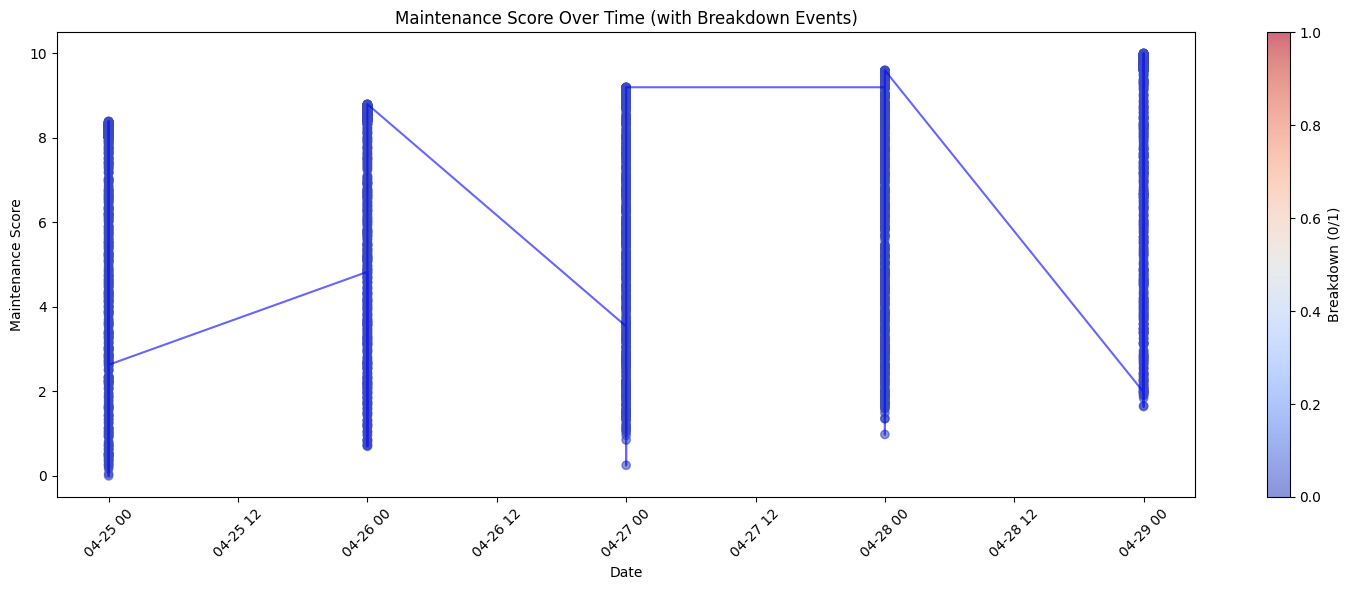

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Maintenance_Score'], color='blue', alpha=0.6)
plt.scatter(df['Date'], df['Maintenance_Score'], c=df['Breakdown'], cmap='coolwarm', alpha=0.6)
plt.title('Maintenance Score Over Time (with Breakdown Events)')
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.colorbar(label='Breakdown (0/1)')
plt.xticks(rotation=45)
plt.tight_layout()

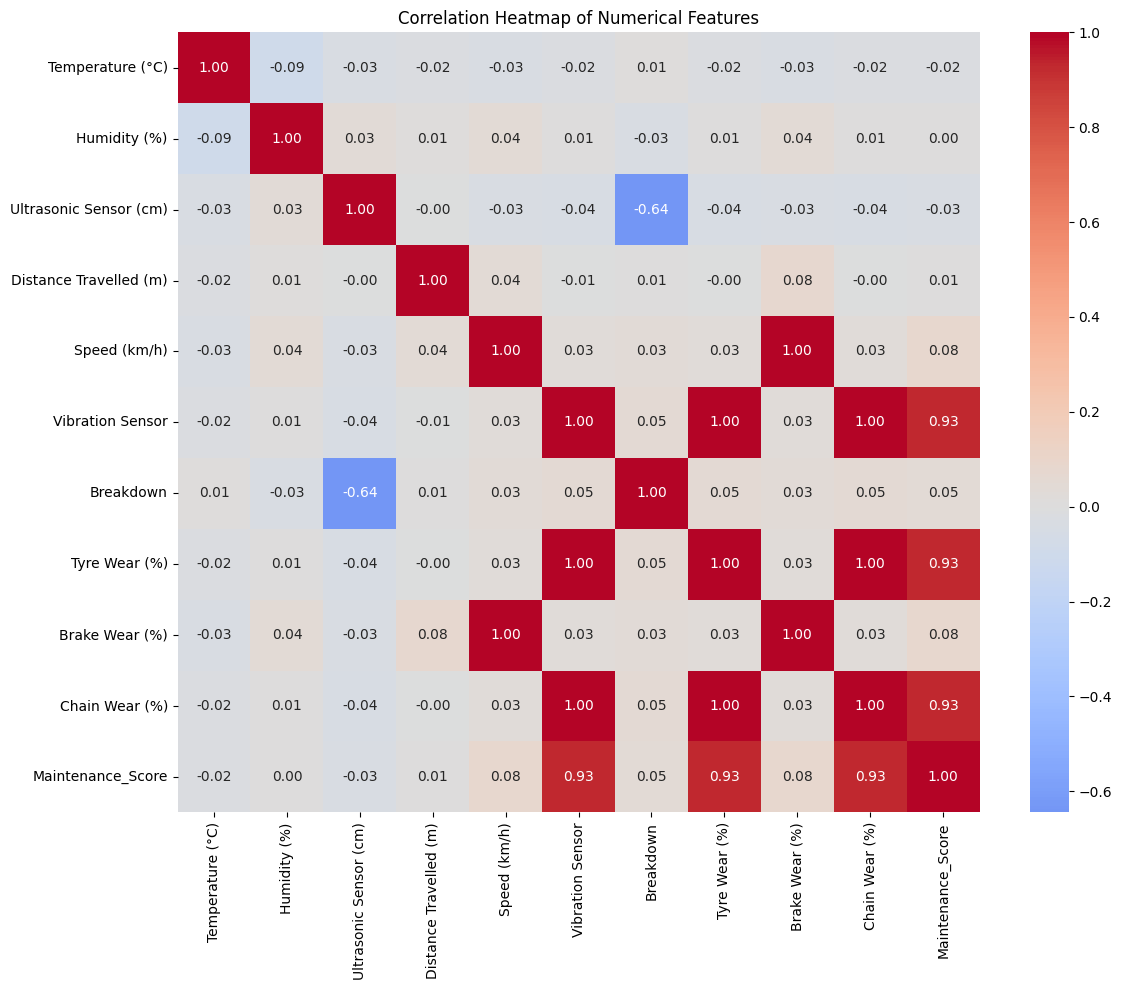

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()

In [ ]:
correlation_matrix

,Temperature (°C),Humidity (%),Ultrasonic Sensor (cm),Distance Travelled (m),Speed (km/h),Vibration Sensor,Breakdown,Tyre Wear (%),Brake Wear (%),Chain Wear (%),Maintenance_Score
Temperature (°C),1.000000,-0.094379,-0.030849,-0.018776,-0.030592,-0.015315,0.011482,-0.015404,-0.030161,-0.015420,-0.018783
Humidity (%),-0.094379,1.000000,0.033004,0.014880,0.044573,0.005179,-0.031862,0.005249,0.044836,0.005261,0.001552
Ultrasonic Sensor (cm),-0.030849,0.033004,1.000000,-0.003736,-0.031604,-0.040944,-0.644413,-0.040963,-0.031750,-0.040966,-0.033570
Distance Travelled (m),-0.018776,0.014880,-0.003736,1.000000,0.038098,-0.007952,0.005075,-0.003232,0.081276,-0.002420,0.006066
Speed (km/h),-0.030592,0.044573,-0.031604,0.038098,1.000000,0.026127,0.031855,0.026308,0.997893,0.026339,0.084666
Vibration Sensor,-0.015315,0.005179,-0.040944,-0.007952,0.026127,1.000000,0.053047,0.999989,0.026831,0.999985,0.932395
Breakdown,0.011482,-0.031862,-0.644413,0.005075,0.031855,0.053047,1.000000,0.053073,0.033031,0.053077,0.045043
Tyre Wear (%),-0.015404,0.005249,-0.040963,-0.003232,0.026308,0.999989,0.053073,1.000000,0.027215,1.000000,0.932448
Brake Wear (%),-0.030161,0.044836,-0.031750,0.081276,0.997893,0.026831,0.033031,0.027215,1.000000,0.027281,0.084984
Chain Wear (%),-0.015420,0.005261,-0.040966,-0.002420,0.026339,0.999985,0.053077,1.000000,0.027281,1.000000,0.932455


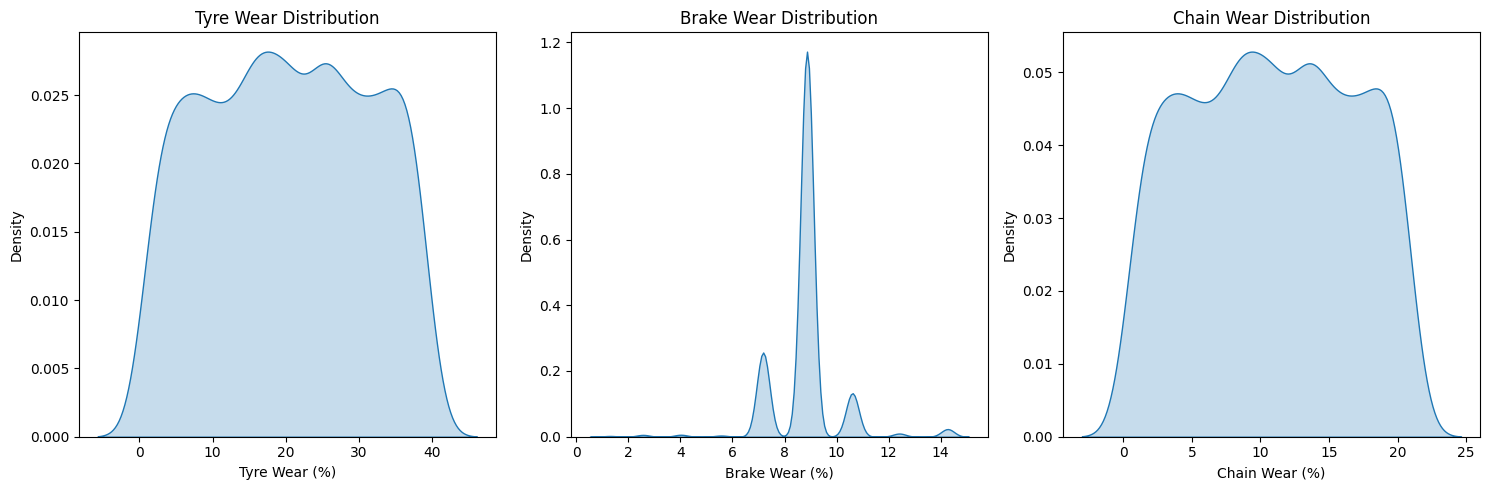

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(data=df, x='Tyre Wear (%)', ax=axes[0], fill=True)
axes[0].set_title('Tyre Wear Distribution')
sns.kdeplot(data=df, x='Brake Wear (%)', ax=axes[1], fill=True)
axes[1].set_title('Brake Wear Distribution')
sns.kdeplot(data=df, x='Chain Wear (%)', ax=axes[2], fill=True)
axes[2].set_title('Chain Wear Distribution')
plt.tight_layout()

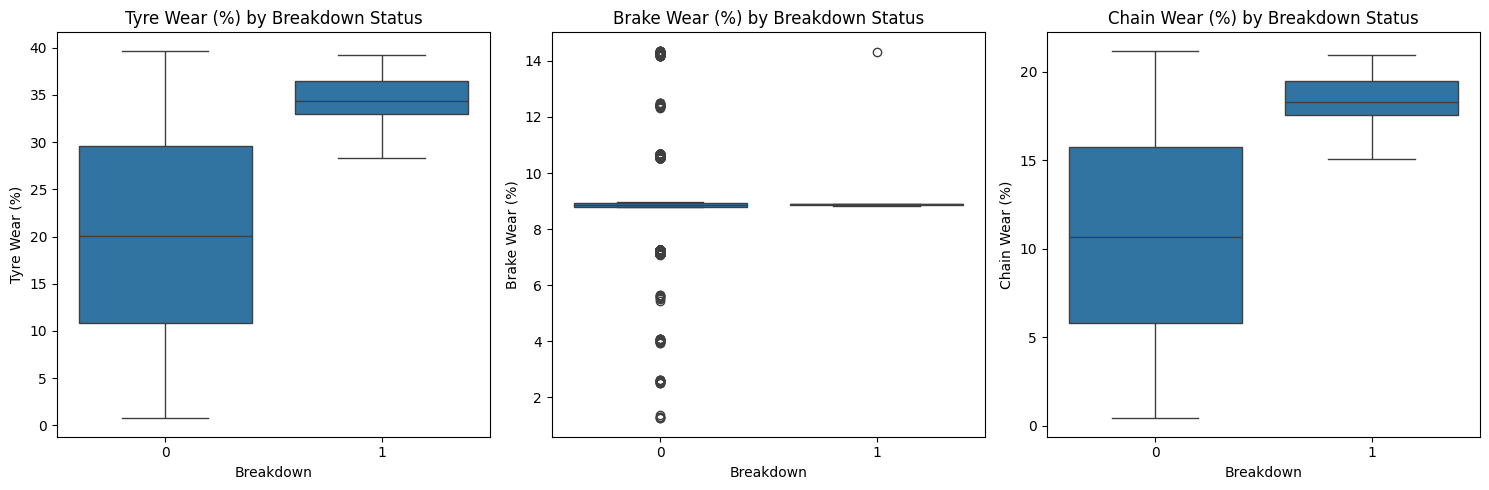

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(['Tyre Wear (%)', 'Brake Wear (%)', 'Chain Wear (%)']):
    sns.boxplot(data=df, x='Breakdown', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Breakdown Status')
plt.tight_layout()

In [ ]:
print("\nStatistical Summary of Key Metrics:")
print(df[['Maintenance_Score', 'Tyre Wear (%)', 'Brake Wear (%)',
          'Chain Wear (%)', 'Temperature (°C)', 'Humidity (%)']].describe())


Statistical Summary of Key Metrics:
       Maintenance_Score  Tyre Wear (%)  Brake Wear (%)  Chain Wear (%)  \
count        3500.000000    3500.000000     3500.000000     3500.000000   
mean            6.426149      20.203879        8.782856       10.801097   
std             2.662695      10.997499        1.237696        5.865320   
min             0.000000       0.755000        1.240000        0.421000   
25%             4.190000      10.853750        8.785814        5.809542   
50%             7.110000      20.090000        8.865814       10.733917   
75%             8.710000      29.622500        8.925814       15.822042   
max            10.000000      39.665000       14.366610       21.187667   

       Temperature (°C)  Humidity (%)  
count       3500.000000   3500.000000  
mean          39.690286     44.782000  
std            1.719570      6.220412  
min           37.000000     40.000000  
25%           38.000000     40.000000  
50%           39.000000     43.000000  
75%    

In [ ]:
print("\nAverage Metrics by Breakdown Status:")
print(df.groupby('Breakdown')[['Maintenance_Score', 'Tyre Wear (%)',
                              'Brake Wear (%)', 'Chain Wear (%)']].mean())


Average Metrics by Breakdown Status:
           Maintenance_Score  Tyre Wear (%)  Brake Wear (%)  Chain Wear (%)
Breakdown                                                                  
0                   6.421179      20.179695        8.781163       10.788198
1                   9.320000      34.286667        9.769280       18.312500


In [ ]:
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# 1. Stationarity Testing
def perform_adf_test(series):
    """Perform Augmented Dickey-Fuller test and return results"""
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    return result[1] < 0.05  # Returns True if stationary
perform_adf_test(df['Maintenance_Score'])

ADF Statistic: -7.801944395937792
p-value: 7.452856326737675e-12
Critical values:
	1%: -3.432232662741111
	5%: -2.8623718531014406
	10%: -2.5672128101590257


True

In [ ]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")  # Convert to datetime
    df = df.sort_values('Date').set_index('Date')  # Sort and set as index
else:
    print("⚠️ Warning: 'Date' column not found in df. Ensure it exists before running.")


⚠️ Warning: 'Date' column not found in df. Ensure it exists before running.


In [ ]:
df.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Ultrasonic Sensor (cm)',
       'Distance Travelled (m)', 'Speed (km/h)', 'Vibration Sensor',
       'Breakdown', 'Tyre Wear (%)', 'Brake Wear (%)', 'Chain Wear (%)',
       'Maintenance_Score'],
      dtype='object')

In [ ]:
# Cell 1: Model Training and Predictions
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
df = pd.read_csv('maintenance.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# Split data
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# 1. Improved ARIMA Model
def fit_arima_with_future(train, test, order, future_steps=7):
    model = ARIMA(train['Maintenance_Score'], order=order)
    results = model.fit()

    # Make predictions for test set
    predictions = results.forecast(steps=len(test))

    # Make future predictions
    future_dates = pd.date_range(start=test.index[-1] + timedelta(days=1),
                                periods=future_steps, freq='D')
    future_predictions = results.forecast(steps=future_steps)

    # Get confidence intervals
    pred_conf = results.get_forecast(steps=len(test) + future_steps)
    conf_int = pred_conf.conf_int()

    return predictions, future_predictions, future_dates, conf_int, results

# Try different ARIMA orders
arima_orders = [(4,0,4), (5,0,5), (6,0,6)]
best_arima_score = float('inf')
best_arima_config = None
best_arima_predictions = None
best_future_pred = None
best_conf_int = None
best_future_dates = None

print("ARIMA Model Results:")
for order in arima_orders:
    try:
        predictions, future_pred, future_dates, conf_int, model = fit_arima_with_future(train, test, order)
        mse = mean_squared_error(test['Maintenance_Score'], predictions)
        mae = mean_absolute_error(test['Maintenance_Score'], predictions)
        r2 = r2_score(test['Maintenance_Score'], predictions)

        print(f"\nARIMA{order}:")
        print(f"MSE: {mse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2: {r2:.4f}")

        if mse < best_arima_score:
            best_arima_score = mse
            best_arima_config = order
            best_arima_predictions = predictions
            best_future_pred = future_pred
            best_future_dates = future_dates
            best_conf_int = conf_int
    except:
        print(f"ARIMA{order} failed to converge")
        continue

# 2. VAR Model
var_columns = ['Maintenance_Score', 'Vibration Sensor', 'Brake Wear (%)']

# Standardize data for VAR
scaler = StandardScaler()
var_train_scaled = pd.DataFrame(
    scaler.fit_transform(train[var_columns]),
    columns=var_columns,
    index=train.index
)
var_test_scaled = pd.DataFrame(
    scaler.transform(test[var_columns]),
    columns=var_columns,
    index=test.index
)

# Fit VAR model
var_model = VAR(var_train_scaled)
var_fitted = var_model.fit(maxlags=2, ic='aic')

# Make predictions
var_predictions = var_fitted.forecast(var_train_scaled.values[-2:], steps=len(test))
var_predictions = scaler.inverse_transform(var_predictions)
var_predictions_df = pd.DataFrame(var_predictions, columns=var_columns, index=test.index)

# Make future predictions with VAR
future_var_pred = var_fitted.forecast(var_predictions[-2:], steps=7)
future_var_pred = scaler.inverse_transform(future_var_pred)
future_var_df = pd.DataFrame(future_var_pred, columns=var_columns, index=best_future_dates)

# Calculate metrics for VAR
var_mse = mean_squared_error(test['Maintenance_Score'], var_predictions_df['Maintenance_Score'])
var_mae = mean_absolute_error(test['Maintenance_Score'], var_predictions_df['Maintenance_Score'])
var_r2 = r2_score(test['Maintenance_Score'], var_predictions_df['Maintenance_Score'])

print("\nVAR Model Results:")
print(f"MSE: {var_mse:.4f}")
print(f"MAE: {var_mae:.4f}")
print(f"R2: {var_r2:.4f}")

ARIMA Model Results:

ARIMA(4, 0, 4):
MSE: 7.2695
MAE: 2.4247
R2: -0.0512

ARIMA(5, 0, 5):
MSE: 7.3396
MAE: 2.4392
R2: -0.0613

ARIMA(6, 0, 6):
MSE: 7.1660
MAE: 2.4021
R2: -0.0362

VAR Model Results:
MSE: 7.9485
MAE: 2.5480
R2: -0.1494


Predicted Values Pattern:


Range: 6.75 to 6.99
Very stable predictions with only small fluctuations
All values are just below 7.0, which is often used as a critical threshold


Confidence Intervals:


Same CI [1.50, 11.77] for all predictions
Very wide range (~10 points)
Suggests high uncertainty in the predictions
The true values could be anywhere from excellent condition (1.50) to critical (11.77)

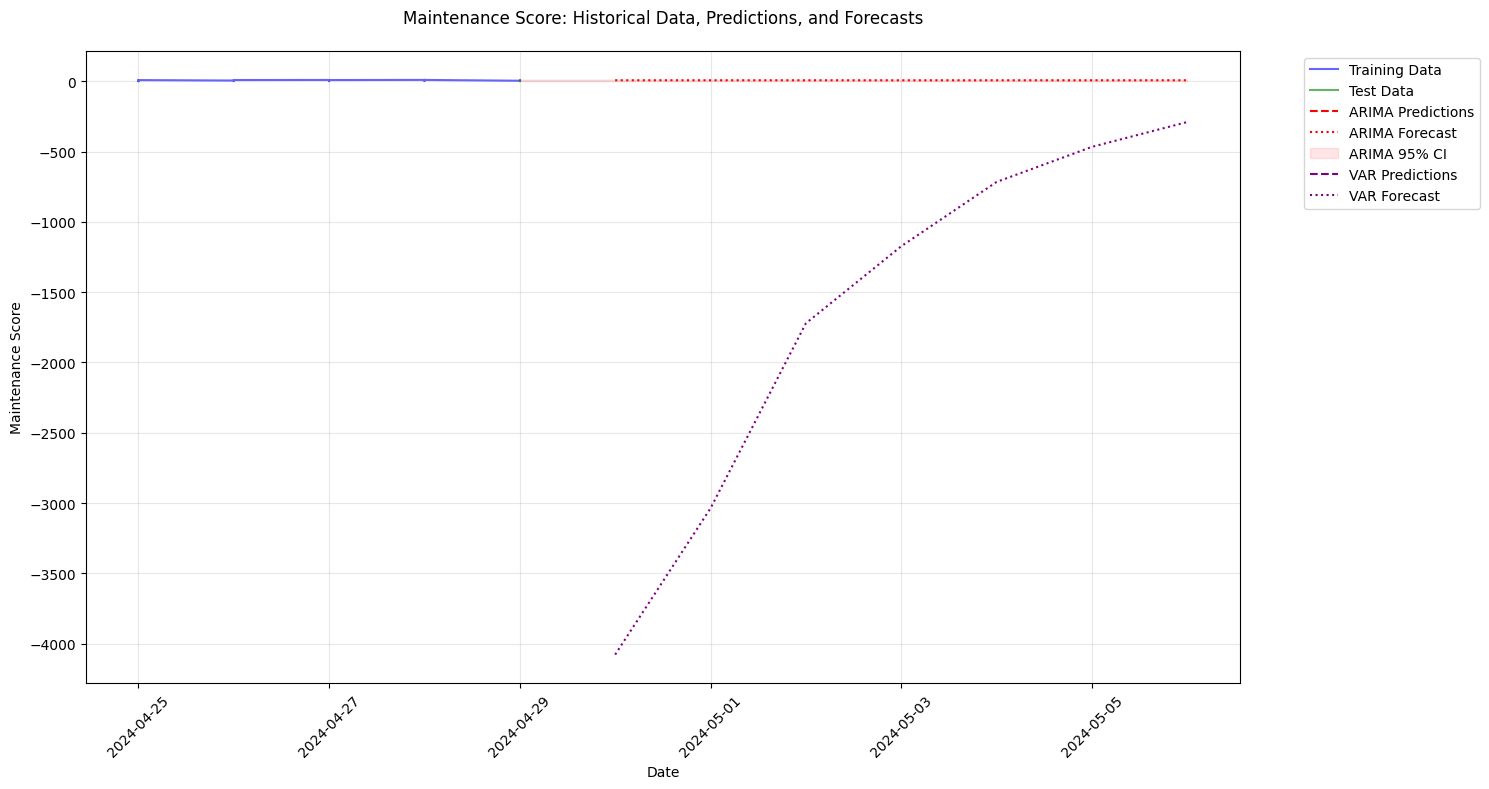


Forecast Summary:

ARIMA Future Forecast:
2024-04-30: 6.99
2024-05-01: 6.83
2024-05-02: 6.87
2024-05-03: 6.75
2024-05-04: 6.85
2024-05-05: 6.83
2024-05-06: 6.96

VAR Future Forecast:
2024-04-30   -4077.469934
2024-05-01   -3036.879699
2024-05-02   -1721.704716
2024-05-03   -1173.749199
2024-05-04    -716.420565
2024-05-05    -466.860389
2024-05-06    -290.083195
Freq: D


In [ ]:
# Cell 2: Visualization of Forecasts
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', color='blue', alpha=0.6)
plt.plot(test.index, test['Maintenance_Score'], label='Test Data', color='green', alpha=0.6)

# Plot ARIMA predictions and forecast
plt.plot(test.index, best_arima_predictions, label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(best_future_dates, best_future_pred, label='ARIMA Forecast', color='red', linestyle=':')

# Plot ARIMA confidence intervals
# Convert DatetimeIndex to pandas Series for concatenation
all_dates = pd.concat([
    pd.Series(test.index),
    pd.Series(best_future_dates)
])
plt.fill_between(all_dates,
                 best_conf_int.iloc[:, 0],
                 best_conf_int.iloc[:, 1],
                 color='red',
                 alpha=0.1,
                 label='ARIMA 95% CI')

# Plot VAR predictions and forecast
plt.plot(test.index, var_predictions_df['Maintenance_Score'],
         label='VAR Predictions', color='purple', linestyle='--')
plt.plot(future_var_df.index, future_var_df['Maintenance_Score'],
         label='VAR Forecast', color='purple', linestyle=':')

# Customize the plot
plt.title('Maintenance Score: Historical Data, Predictions, and Forecasts', pad=20)
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print forecast summary
print("\nForecast Summary:")
print("\nARIMA Future Forecast:")
for date, value in zip(best_future_dates, best_future_pred):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

print("\nVAR Future Forecast:")
print(future_var_df['Maintenance_Score'].to_string())

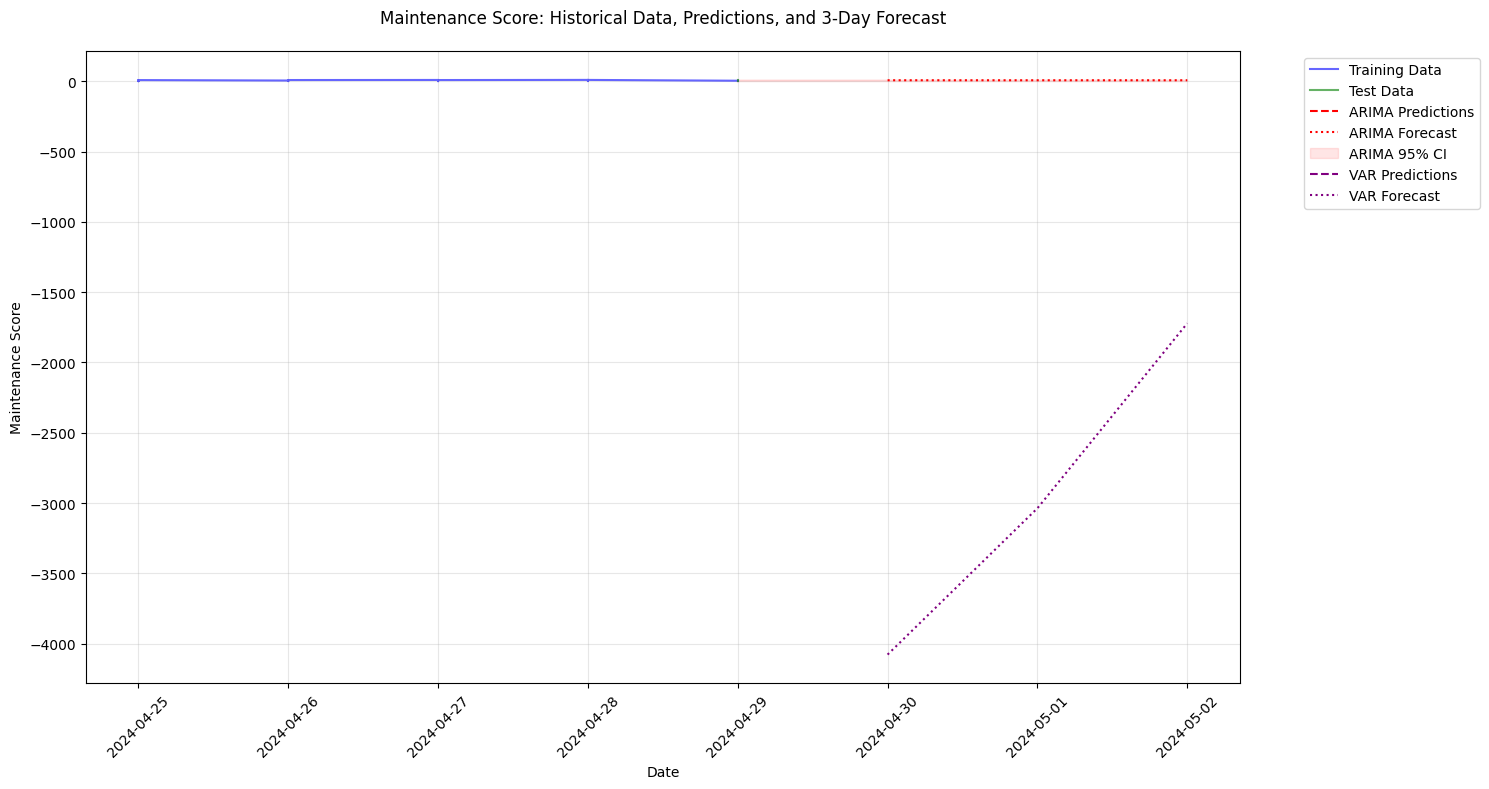


3-Day Forecast Summary:

ARIMA Future Forecast:
2024-04-30: 6.99
2024-05-01: 6.83
2024-05-02: 6.87

VAR Future Forecast:
2024-04-30   -4077.469934
2024-05-01   -3036.879699
2024-05-02   -1721.704716
Freq: D


In [ ]:
# Cell 2: Visualization of Forecasts
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', color='blue', alpha=0.6)
plt.plot(test.index, test['Maintenance_Score'], label='Test Data', color='green', alpha=0.6)

# Plot ARIMA predictions and forecast (only 3 days)
plt.plot(test.index, best_arima_predictions, label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(best_future_dates[:3], best_future_pred[:3], label='ARIMA Forecast', color='red', linestyle=':')

# Plot ARIMA confidence intervals (only 3 days)
all_dates = pd.concat([
    pd.Series(test.index),
    pd.Series(best_future_dates[:3])
])
plt.fill_between(all_dates,
                 best_conf_int.iloc[:len(test)+3, 0],
                 best_conf_int.iloc[:len(test)+3, 1],
                 color='red',
                 alpha=0.1,
                 label='ARIMA 95% CI')

# Plot VAR predictions and forecast (only 3 days)
plt.plot(test.index, var_predictions_df['Maintenance_Score'],
         label='VAR Predictions', color='purple', linestyle='--')
plt.plot(future_var_df.index[:3], future_var_df['Maintenance_Score'][:3],
         label='VAR Forecast', color='purple', linestyle=':')

# Customize the plot
plt.title('Maintenance Score: Historical Data, Predictions, and 3-Day Forecast', pad=20)
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print 3-day forecast summary
print("\n3-Day Forecast Summary:")
print("\nARIMA Future Forecast:")
for date, value in zip(best_future_dates[:3], best_future_pred[:3]):
    print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

print("\nVAR Future Forecast:")
print(future_var_df['Maintenance_Score'][:3].to_string())

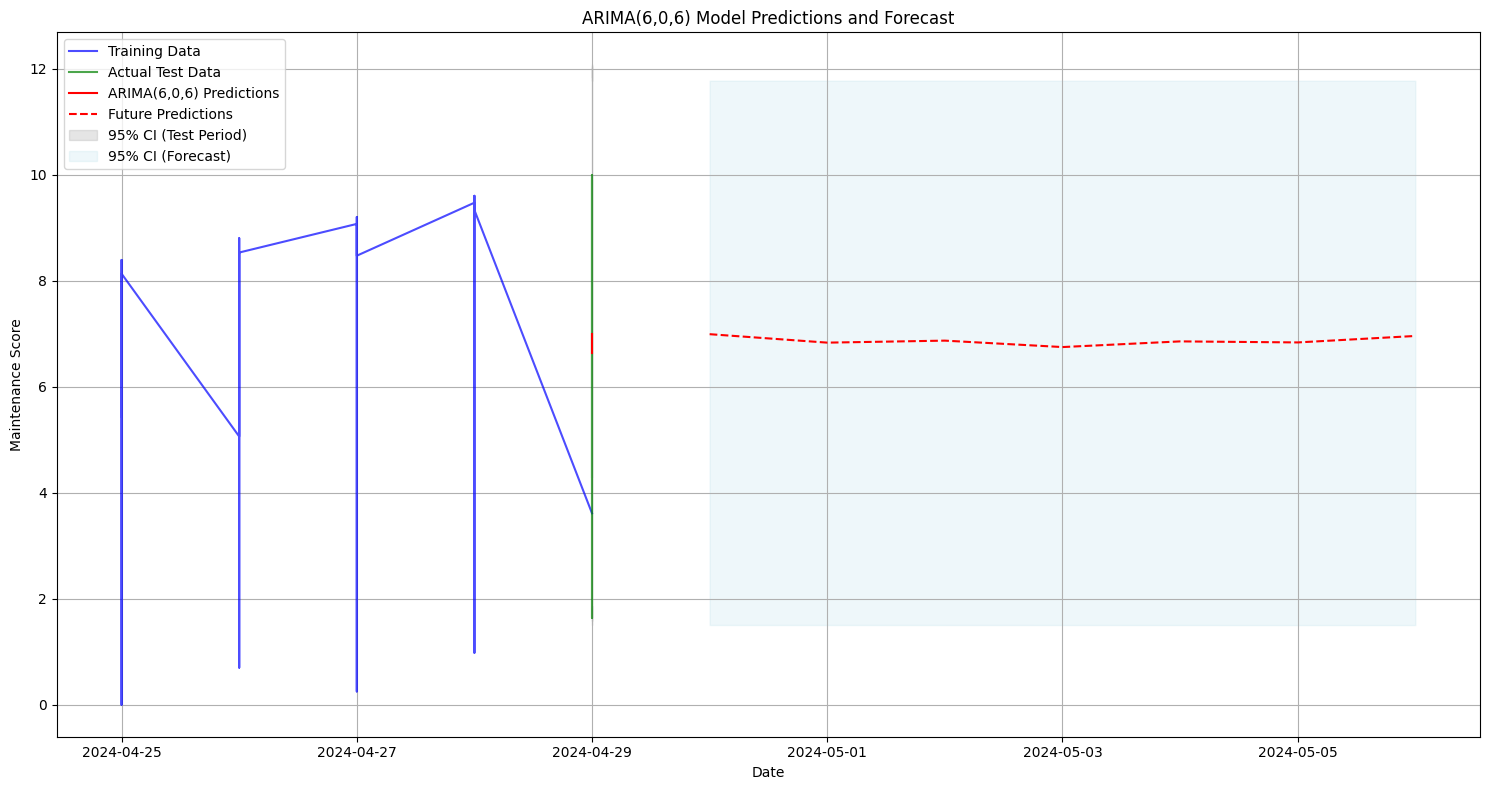


Next Week Predictions (ARIMA):
2024-04-30: 6.99 (95% CI: [1.50, 11.77])
2024-05-01: 6.83 (95% CI: [1.50, 11.77])
2024-05-02: 6.87 (95% CI: [1.50, 11.77])
2024-05-03: 6.75 (95% CI: [1.50, 11.77])
2024-05-04: 6.85 (95% CI: [1.50, 11.77])
2024-05-05: 6.83 (95% CI: [1.50, 11.77])
2024-05-06: 6.96 (95% CI: [1.50, 11.77])


In [ ]:
# Cell: Plotting Best Model Only
plt.figure(figsize=(15, 8))

# Historical data and test predictions
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', alpha=0.7, color='blue')
plt.plot(test.index, test['Maintenance_Score'], label='Actual Test Data', alpha=0.7, color='green')
plt.plot(test.index, best_arima_predictions, label=f'ARIMA(6,0,6) Predictions', color='red')

# Future predictions
plt.plot(best_future_dates, best_future_pred, '--', label='Future Predictions', color='red')

# Plot confidence intervals
plt.fill_between(test.index,
                 best_conf_int.iloc[:len(test), 0],
                 best_conf_int.iloc[:len(test), 1],
                 alpha=0.2,
                 color='gray',
                 label='95% CI (Test Period)')

plt.fill_between(best_future_dates,
                 best_conf_int.iloc[-7:, 0],
                 best_conf_int.iloc[-7:, 1],
                 alpha=0.2,
                 color='lightblue',
                 label='95% CI (Forecast)')

plt.title('ARIMA(6,0,6) Model Predictions and Forecast')
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print future predictions
print("\nNext Week Predictions (ARIMA):")
for date, pred, lower, upper in zip(best_future_dates, best_future_pred,
                                   best_conf_int.iloc[-7:, 0], best_conf_int.iloc[-7:, 1]):
    print(f"{date.date()}: {pred:.2f} (95% CI: [{lower:.2f}, {upper:.2f}])")

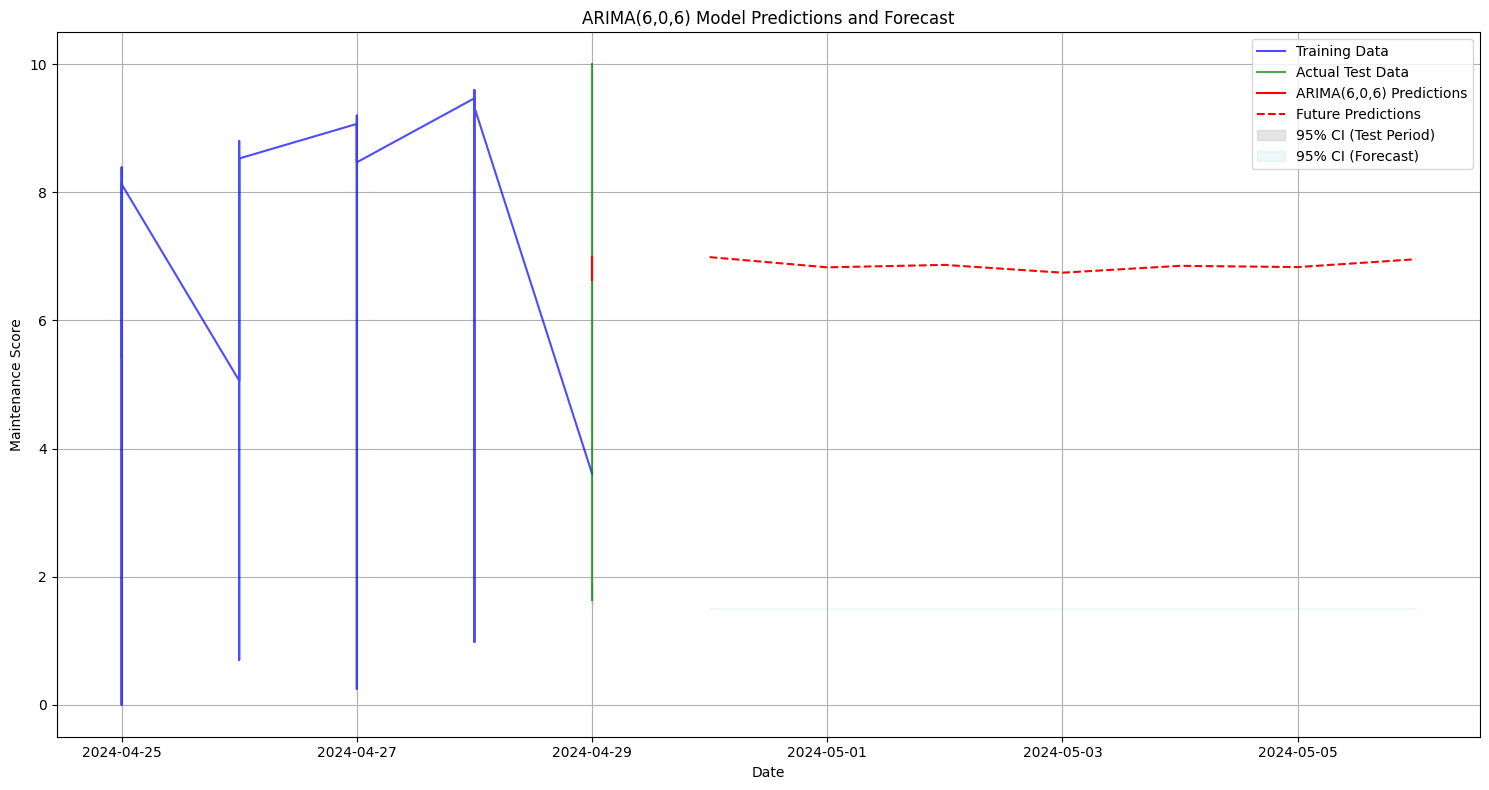


Next Week Predictions (ARIMA):
2024-04-30: 6.99 (95% CI: [1.50, 11.77])
2024-05-01: 6.83 (95% CI: [1.50, 11.77])
2024-05-02: 6.87 (95% CI: [1.50, 11.77])
2024-05-03: 6.75 (95% CI: [1.50, 11.77])
2024-05-04: 6.85 (95% CI: [1.50, 11.77])
2024-05-05: 6.83 (95% CI: [1.50, 11.77])
2024-05-06: 6.96 (95% CI: [1.50, 11.77])


In [ ]:
# Cell: Plotting Best Model Only
plt.figure(figsize=(15, 8))

# Historical data and test predictions
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', alpha=0.7, color='blue')
plt.plot(test.index, test['Maintenance_Score'], label='Actual Test Data', alpha=0.7, color='green')
plt.plot(test.index, best_arima_predictions, label=f'ARIMA(6,0,6) Predictions', color='red')

# Future predictions
plt.plot(best_future_dates, best_future_pred, '--', label='Future Predictions', color='red')

# Plot confidence intervals
plt.fill_between(test.index,
                 best_conf_int.iloc[:len(test), 0],
                 best_conf_int.iloc[:len(test), 0],
                 alpha=0.2,
                 color='gray',
                 label='95% CI (Test Period)')

plt.fill_between(best_future_dates,
                 best_conf_int.iloc[-7:, 0],
                 best_conf_int.iloc[-7:, 0],
                 alpha=0.2,
                 color='lightblue',
                 label='95% CI (Forecast)')

plt.title('ARIMA(6,0,6) Model Predictions and Forecast')
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print future predictions
print("\nNext Week Predictions (ARIMA):")
for date, pred, lower, upper in zip(best_future_dates, best_future_pred,
                                   best_conf_int.iloc[-7:, 0], best_conf_int.iloc[-7:, 1]):
    print(f"{date.date()}: {pred:.2f} (95% CI: [{lower:.2f}, {upper:.2f}])")

In [ ]:
train1=train.iloc[:-2,:].tail()

In [ ]:
test1 = pd.concat([train.iloc[[-1]], test], ignore_index=True)

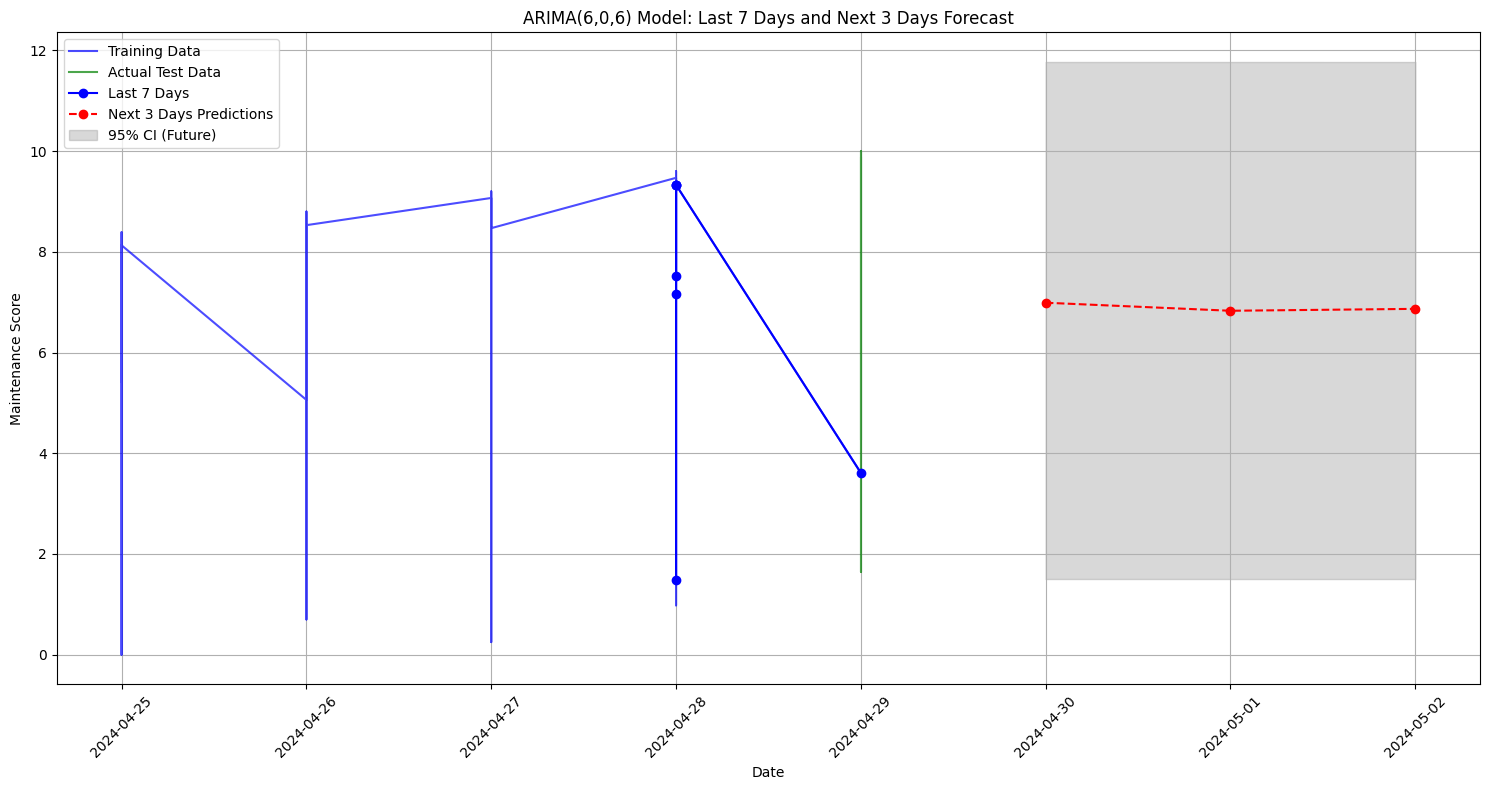


Next 3 Days Predictions (ARIMA):
2024-04-30: 6.99 (95% CI: [1.50, 11.77])
2024-05-01: 6.83 (95% CI: [1.50, 11.77])
2024-05-02: 6.87 (95% CI: [1.50, 11.77])


In [ ]:
n_past = 7
n_future = 3

# Extract last 7 days of actual data
past_dates = train.index[-n_past:]
past_values = train['Maintenance_Score'].iloc[-n_past:]

# Extract next 3 days of future predictions
future_dates_3 = best_future_dates[:n_future]
future_pred_3 = best_future_pred[:n_future]
conf_int_3 = best_conf_int.iloc[-n_future:]

# **Plotting the data**
plt.figure(figsize=(15, 8))

# Plot training data (blue)
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', color='blue', alpha=0.7)

# Plot actual test data (green)
plt.plot(test.index, test['Maintenance_Score'], label='Actual Test Data', color='green', alpha=0.7)

# Plot ARIMA predictions on test data (red)
# plt.plot(test.index, best_arima_predictions, label=f'ARIMA(6,0,6) Predictions', color='red')

# Plot past 7 days actual data (blue)
plt.plot(past_dates, past_values, 'o-', color='blue', label='Last 7 Days')

# Plot future 3 days predictions (red dashed line)
plt.plot(future_dates_3, future_pred_3, 'o--', color='red', label='Next 3 Days Predictions')

# Confidence Interval for future predictions
plt.fill_between(future_dates_3, conf_int_3.iloc[:, 0], conf_int_3.iloc[:, 1],
                 color='gray', alpha=0.3, label='95% CI (Future)')

# Labels & Legends
plt.title('ARIMA(6,0,6) Model: Last 7 Days and Next 3 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Print next 3 days predictions**
print("\nNext 3 Days Predictions (ARIMA):")
for date, pred, lower, upper in zip(future_dates_3, future_pred_3, conf_int_3.iloc[:, 0], conf_int_3.iloc[:, 1]):
    print(f"{date.date()}: {pred:.2f} (95% CI: [{lower:.2f}, {upper:.2f}])")

In [ ]:
import matplotlib.pyplot as plt

# Parameters
n_past = 7
n_future = 3

# Extract last 7 days of actual data
past_dates = train.index[-n_past:]
past_values = train['Maintenance_Score'].iloc[-n_past:]

# Extract last available training date and its actual value
last_train_date = train.index[-1]
actual_last_value = train['Maintenance_Score'].iloc[-1]

# Predict for the last training date (should be close to actual value)
pred_last_train = best_arima_model.forecast(steps=1)[0]  # Assuming best_arima_model is your trained model
conf_int_last = best_conf_int.iloc[-(n_future+1)]  # Get confidence interval

# Extract next 3 days of future predictions
future_dates_3 = best_future_dates[:n_future]
future_pred_3 = best_future_pred[:n_future]
conf_int_3 = best_conf_int.iloc[-n_future:]

# **Plotting the data**
plt.figure(figsize=(15, 8))

# Plot training data (blue)
plt.plot(train.index, train['Maintenance_Score'], label='Training Data', color='blue', alpha=0.7)

# Plot actual test data (green)
plt.plot(test.index, test['Maintenance_Score'], label='Actual Test Data', color='green', alpha=0.7)

# Plot past 7 days actual data (blue markers)
plt.plot(past_dates, past_values, 'o-', color='blue', label='Last 7 Days')

# Plot last training day prediction (orange)
plt.plot(last_train_date, pred_last_train, 'ro', markersize=8, label='Predicted Last Train Day')
plt.errorbar(last_train_date, pred_last_train,
             yerr=[[pred_last_train - conf_int_last[0]], [conf_int_last[1] - pred_last_train]],
             fmt='o', color='orange', capsize=5)

# Plot future 3 days predictions (red dashed line)
plt.plot(future_dates_3, future_pred_3, 'o--', color='red', label='Next 3 Days Predictions')

# Confidence Interval for future predictions
plt.fill_between(future_dates_3, conf_int_3.iloc[:, 0], conf_int_3.iloc[:, 1],
                 color='gray', alpha=0.3, label='95% CI (Future)')

# Labels & Legends
plt.title('ARIMA Model: Last 7 Days, Last Train Day, and Next 3 Days Forecast')
plt.xlabel('Date')
plt.ylabel('Maintenance Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# **Print predictions**
print(f"\nPredicted Last Train Day ({last_train_date.date()}): {pred_last_train:.2f} "
      f"(Actual: {actual_last_value:.2f}, 95% CI: [{conf_int_last[0]:.2f}, {conf_int_last[1]:.2f}])")

print("\nNext 3 Days Predictions (ARIMA):")
for date, pred, lower, upper in zip(future_dates_3, future_pred_3, conf_int_3.iloc[:, 0], conf_int_3.iloc[:, 1]):
    print(f"{date.strftime('%Y-%m-%d')}: {pred:.2f} (95% CI: [{lower:.2f}, {upper:.2f}])")


NameError: name 'best_arima_model' is not defined

In [ ]:
test1.head()

,Temperature (°C),Humidity (%),Ultrasonic Sensor (cm),Distance Travelled (m),Speed (km/h),Vibration Sensor,Breakdown,Tyre Wear (%),Brake Wear (%),Chain Wear (%),Maintenance Alert,Maintenance_Score
0,42,42,32.7,11,5,1393,0,7.185,7.118648,3.852167,0,3.61
1,37,53,32.8,12,6,6366,0,32.070,8.825814,17.126000,0,9.87
2,41,41,33.0,16,6,3378,0,17.210,8.905814,9.208000,0,7.07
3,43,40,32.7,17,6,3677,0,18.725,8.925814,10.017833,0,7.55
4,41,40,32.8,18,6,4555,0,23.135,8.945814,12.371667,0,8.91
